In [ ]:
# !pip install requests
# !pip install tabulate
# !pip install future

# # # Required for plotting:
# # !pip install matplotlib

In [ ]:
# !pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


In [ ]:
# # !pip3 uninstall numpy
# # !pip3 install numpy --upgrade --user 
# # !pip install numpy==1.22 --user
# # !pip install lightgbm
# !pip install tensorflow

In [88]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import h2o
from h2o.automl import H2OAutoML
import math
import pickle


In [52]:
# !pip install --upgrade lightgbm

In [53]:
# # Don't know why but I need to run the below code "twice".

# import h2o

# import locale
# locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# # h2o.init(encoding= "ISO-8859-1")  # You can replace "ISO-8859-1" with the appropriate encoding for your data

# h2o.init()
# # h2o.demo("glm")

In [89]:
# from google.colab import drive
# drive.mount('/content/drive')

import os
import gc
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask
working_directory = 'D:\\OneDrive - 한동대학교\\PROJECT\\트머프로젝트\\'  ## 서로 다른 환경에서는 이곳을 수정해야 함.
# working_directory = 'C:\\Users\\user\\OneDrive - 한동대학교\\PROJECT\\트머프로젝트\\'

os.chdir(working_directory)
gc.collect()


3574

In [90]:
# RMSPE 계산 함수
def rmspe(y_true, y_pred):
    return  np.sqrt(np.mean(np.square((y_true - y_pred) / (y_true))))

# Updated dataset

In [91]:

import gc
import os
working_directory = 'D:\\OneDrive - 한동대학교\\PROJECT\\트머프로젝트\\'  ## 서로 다른 환경에서는 이곳을 수정해야 함.
# working_directory = 'C:\\Users\\user\\OneDrive - 한동대학교\\PROJECT\\트머프로젝트\\'

os.chdir(working_directory)
gc.collect()

# load dataset
coin = 'BTC'
target_var = 'dv5_realized_volatility_mean0'
target_var_3 = target_var[:3]

df3 = pd.read_csv("./output/{}_sum_plus_nn_features_for_{}.csv".format(coin, target_var_3))
# df_2 = pd.read_parquet('/content/drive/MyDrive/트머프/my.parquet')


In [92]:
pd.set_option('display.max_columns', None)
print(df3.shape)
df3.head(3)

(65169, 7145)


,realized_volatility_mean0,num_trades,lowest_return,highest_return,high_low_gap,trade_vol,time_id,BB_width_w20,BB_width_w40,BB_width_w10,dv5_realized_volatility_mean0,realized_volatility_mean0_150,num_trades_150,lowest_return_150,highest_return_150,high_low_gap_150,trade_vol_150,realized_volatility_mean0_300,num_trades_300,lowest_return_300,highest_return_300,high_low_gap_300,trade_vol_300,realized_volatility_mean0_450,num_trades_450,lowest_return_450,highest_return_450,high_low_gap_450,trade_vol_450,liq_last_1,liq_last_2,liq_last_5,liq_last_10,liq_last_15,ep_liq_1,ep_liq_2,ep_liq_5,ep_liq_10,ep_liq_15,bidask_spread_0,bidask_spread_1,liq_last_1_150,liq_last_2_150,liq_last_5_150,liq_last_10_150,liq_last_15_150,ep_liq_1_150,ep_liq_2_150,ep_liq_5_150,ep_liq_10_150,ep_liq_15_150,bidask_spread_0_150,bidask_spread_1_150,liq_last_1_300,liq_last_2_300,liq_last_5_300,liq_last_10_300,liq_last_15_300,ep_liq_1_300,ep_liq_2_300,ep_liq_5_300,ep_liq_10_300,ep_liq_15_300,bidask_spread_0_300,bidask_spread_1_300,liq_last_1_450,liq_last_2_450,liq_last_5_450,liq_last_10_450,liq_last_15_450,ep_liq_1_450,ep_liq_2_450,ep_liq_5_450,ep_liq_10_450,ep_liq_15_450,bidask_spread_0_450,bidask_spread_1_450,realized_volatility_30s,trade.tau,tvpl1,tvpl2,tvpl5,tvpl10,tvpl15,tvpl_ep1,tvpl_ep2,tvpl_ep5,tvpl_ep10,tvpl_ep15,realized_volatility_mean0_nn2_realized_volatility_mean0_m_p1_mean,realized_volatility_mean0_nn2_bidask_spread_0_m_p1_mean,realized_volatility_mean0_nn2_bidask_spread_1_m_p1_mean,realized_volatility_mean0_nn2_highest_return_m_p1_mean,realized_volatility_mean0_nn2_lowest_return_m_p1_mean,realized_volatility_mean0_nn2_num_trades_m_p1_mean,realized_volatility_mean0_nn2_high_low_gap_m_p1_mean,realized_volatility_mean0_nn2_BB_width_w10_m_p1_mean,realized_volatility_mean0_nn2_BB_width_w20_m_p1_mean,realized_volatility_mean0_nn2_liq_last_1_m_p1_mean,realized_volatility_mean0_nn2_liq_last_5_m_p1_mean,realized_volatility_mean0_nn2_ep_liq_1_m_p1_mean,realized_volatility_mean0_nn2_ep_liq_5_m_p1_mean,realized_volatility_mean0_nn2_tvpl1_m_p1_mean,realized_volatility_mean0_nn2_tvpl5_m_p1_mean,realized_volatility_mean0_nn2_tvpl_ep1_m_p1_mean,realized_volatility_mean0_nn2_tvpl_ep5_m_p1_mean,realized_volatility_mean0_nn2_trade_vol_m_p1_mean,realized_volatility_mean0_nn2_trade.tau_m_p1_mean,realized_volatility_mean0_nn2_high5_nn_m_mean,realized_volatility_mean0_nn2_low5_nn_m_mean,realized_volatility_mean0_nn2_high5_abs_nn_m_mean,realized_volatility_mean0_nn2_low5_abs_nn_m_mean,realized_volatility_mean0_nn2_all_nn_m_p1_mean,realized_volatility_mean0_nn4_realized_volatility_mean0_m_p1_mean,realized_volatility_mean0_nn4_bidask_spread_0_m_p1_mean,realized_volatility_mean0_nn4_bidask_spread_1_m_p1_mean,realized_volatility_mean0_nn4_highest_return_m_p1_mean,realized_volatility_mean0_nn4_lowest_return_m_p1_mean,realized_volatility_mean0_nn4_num_trades_m_p1_mean,realized_volatility_mean0_nn4_high_low_gap_m_p1_mean,realized_volatility_mean0_nn4_BB_width_w10_m_p1_mean,realized_volatility_mean0_nn4_BB_width_w20_m_p1_mean,realized_volatility_mean0_nn4_liq_last_1_m_p1_mean,realized_volatility_mean0_nn4_liq_last_5_m_p1_mean,realized_volatility_mean0_nn4_ep_liq_1_m_p1_mean,realized_volatility_mean0_nn4_ep_liq_5_m_p1_mean,realized_volatility_mean0_nn4_tvpl1_m_p1_mean,realized_volatility_mean0_nn4_tvpl5_m_p1_mean,realized_volatility_mean0_nn4_tvpl_ep1_m_p1_mean,realized_volatility_mean0_nn4_tvpl_ep5_m_p1_mean,realized_volatility_mean0_nn4_trade_vol_m_p1_mean,realized_volatility_mean0_nn4_trade.tau_m_p1_mean,realized_volatility_mean0_nn4_high5_nn_m_mean,realized_volatility_mean0_nn4_low5_nn_m_mean,realized_volatility_mean0_nn4_high5_abs_nn_m_mean,realized_volatility_mean0_nn4_low5_abs_nn_m_mean,realized_volatility_mean0_nn4_all_nn_m_p1_mean,realized_volatility_mean0_nn8_realized_volatility_mean0_m_p1_mean,realized_volatility_mean0_nn8_bidask_spread_0_m_p1_mean,realized_volatility_mean0_nn8_bidask_spread_1_m_p1_mean,realized_volatility_mean0_nn8_highest_return_m_p1_mean,realized_vol

In [58]:
X_col = df3
X_col=X_col.drop('time_id', axis=1)
y_col = df3[target_var]
# pd.set_option('display.max_columns', None)
# X_col.head(3)

In [59]:
# Specify the file name you want to open

corr_cutpoint = 90

# file_name = 'selected_feat_ranfo.pkl'

file_name = "selected_feat_RF_{}_{}_{}.pkl".format(coin, target_var_3, corr_cutpoint)


# Open the file in binary read mode and load the list using pickle.load()
with open(file_name, "rb") as file:
    top_n_features_RF = pickle.load(file)

print(f"Loaded list: {top_n_features_RF}")


Loaded list: Index(['bidask_spread_1', 'realized_volatility_mean0', 'liq_last_10',
       'high_low_gap', 'tvpl5', 'tvpl10', 'num_trades_450',
       'BB_width_w20_nn64_ep_liq_5_m_p1_median', 'num_trades', 'tvpl_ep1',
       ...
       'trade_vol_nn2_liq_last_1_m_p1_mean', 'tvpl1_nn2_trade_vol_m_p1_median',
       'highest_return_nn2_num_trades_m_p1_mean',
       'trade_vol_nn2_liq_last_5_m_p1_median',
       'num_trades_nn2_tvpl_ep1_m_p1_median',
       'realized_volatility_30s_nn2_trade_vol_m_p1_median',
       'trade.tau_nn2_all_nn_m_p1_mean',
       'bidask_spread_1_nn2_low5_abs_nn_m_mean',
       'high_low_gap_nn2_BB_width_w20_m_p1_mean',
       'realized_volatility_30s_nn2_ep_liq_5_m_p1_mean'],
      dtype='object', length=5635)


In [84]:
# Create a new dataset with only the selected features
# len(top_n_features_RF)
num_of_selected_features = 2048 # max: 512
# X_rf_selected = X_col[top_n_features_RF[:num_of_selected_features]]

# 전체를 다 넣어볼까?
X_rf_selected = X_col
X_rf_selected=X_rf_selected.drop('dv5_realized_volatility_mean0', axis=1)

In [75]:
# from sklearn.decomposition import PCA
# # from sklearn.datasets import load_boston

# # Load your dataset (replace this with your data)
# X = X_col

# # Specify the number of components (features) you want to select
# n_components = 300

# # Create a PCA instance with the desired number of components
# pca = PCA(n_components=n_components)

# # Fit PCA to your data and transform it to the selected number of components
# X_new = pca.fit_transform(X) # X_new now contains the selected features

# X_pca = pd.DataFrame(data=X_new)


In [76]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Plot a histogram for the 'Age' column
# plt.hist(y_col, bins=100, edgecolor='black', alpha=0.7)  # Adjust the number of bins as needed
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

In [85]:
# Create a new dataset with only the selected features
# X_selected = X_col[:, top_n_features]

# X_selected = X_rf_selected

# Now, you can use X_selected for training your model with the selected features
# list = [y_col, y_col2, y_col3, y_col4]
# list_name = ['dv1_realized_volatility', 'dv2_lowest_return','dv3_highest_return','dv4_realized_volatility_30s']

# for i in len(list):
gc.collect()
print('LOOP beginning')
# df_selected = pd.concat([X_pca, i], axis=1, ignore_index=False)

# train, test = train_test_split(df_selected, test_size=0.2, shuffle=False)

# train = h2o.H2OFrame(train)
# test = h2o.H2OFrame(test)

X_train, X_test, y_train, y_test = train_test_split(X_rf_selected, y_col, test_size=0.1, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = False)

# LightGBM 데이터셋으로 변환
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val)

params = {
    'objective': 'regression',  # 회귀 문제
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'metric': 'l2',             # Mean Squared Error
    'num_leaves': 100,          # 리프 노드의 최대 수 (mean_leaves에 가깝게 설정)
    'min_data_in_leaf': 50,     # 한 리프에 최소한으로 필요한 레코드 수
    'max_depth': 15,            # 최대 깊이 (max_depth에 맞춤)
    'learning_rate': 0.05,      # 학습률
    'feature_fraction': 0.9,    # 트리를 학습할 때마다 선택할 피처의 비율
    'bagging_fraction': 0.8,    # 트리를 학습할 때마다 선택할 데이터의 비율
    'bagging_freq': 5,          # bagging의 빈도
    'n_estimators': 105         # 총 트리의 수 (number_of_trees에 맞춤)
}

print('Starting training...')
gbm = lgb.train(params,
    lgb_train,
    num_boost_round=500,
    valid_sets=lgb_eval)
    # early_stopping_rounds=50)

# 모델 예측
print('Starting predicting...')

# 모델 평가0
y_train_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
print('TRAIN SET1: The RMSPE of prediction is:', rmspe(y_train, y_train_pred))

# 모델 평가1
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print('TEST SET1: The RMSPE of prediction is:', rmspe(y_test, y_pred))

# 모델 평가2: dv5의 극값에 대해 예측을 잘 하는가?
num_elements_to_select = int(0.01 * len(y_test))
# Use the nlargest method to get the indices of the top 1% values
top_1_percent_indices = y_test.nlargest(num_elements_to_select).index
y_test_1p = y_test[top_1_percent_indices]

print("average y_test:", y_test.mean())
print("average y_test_1p:", y_test_1p.mean())

X_test_1p = X_test.loc[top_1_percent_indices]
y_pred_1p = gbm.predict(X_test_1p, num_iteration=gbm.best_iteration)
print('TEST SET2: The RMSPE of prediction in 1p sample is:', rmspe(y_test_1p, y_pred_1p))


LOOP beginning
Starting training...


c:\Users\hhkim\AppData\Local\Programs\Python\Python37\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.485652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1821465
[LightGBM] [Info] Number of data points in the train set: 46921, number of used features: 7143
[LightGBM] [Info] Start training from score 0.000175
Starting predicting...
The RMSPE of prediction is: 0.4194466984980747
average y_test: 0.00017619276827476998
average y_test_1p: 0.0003527729272666569
The RMSPE of prediction in 1p sample is: 0.4320375156693683


In [86]:
def plot_range_lgbm(start, end):
  x_range = range(len(y_test[start:end]))

  plt.figure(figsize=(14,7))

  plt.plot(x_range, y_test[start:end], label='True', color='blue')
  plt.plot(x_range, y_pred[start:end], label='Predictions', color='red', linestyle='--')

  plt.title('True volatility vs Prediction volatility')
  plt.legend()
  plt.xlabel('Data Point Index')
  plt.ylabel('volatility')
  plt.show()

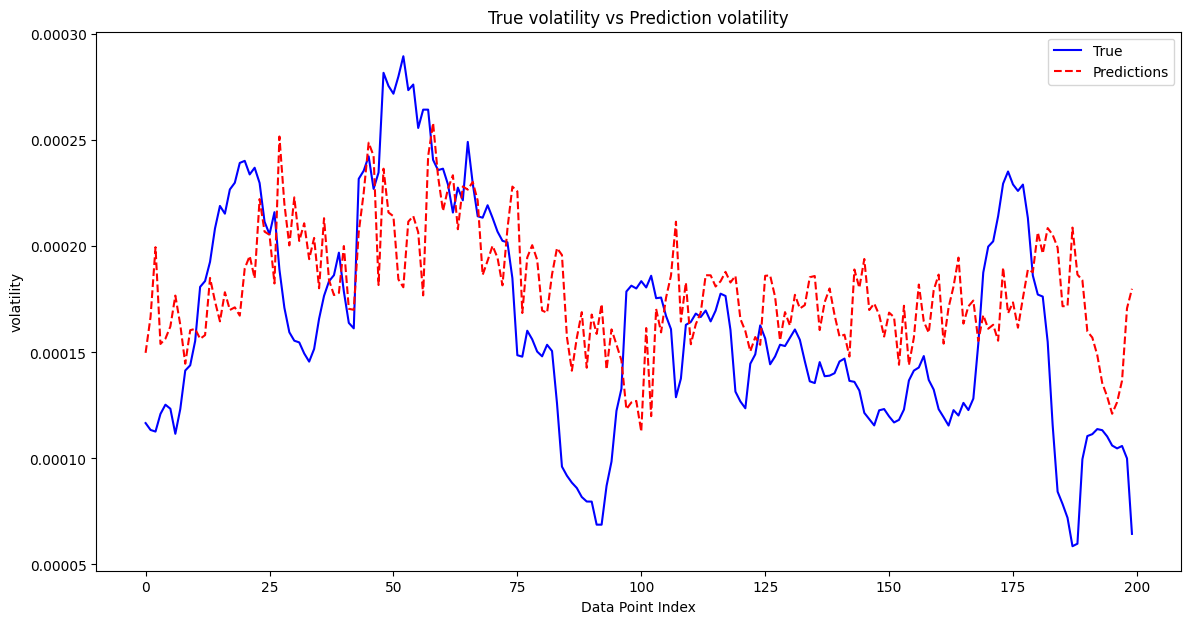

In [87]:
plot_range_lgbm(0,200)

# 아래는 미사용

In [44]:
# Create a new dataset with only the selected features
# X_selected = X_col[:, top_n_features]

# Now, you can use X_selected for training your model with the selected features
df_selected = pd.concat([X_pca, y_col3], axis=1, ignore_index=False)

In [45]:
train, test = train_test_split(df_selected, test_size=0.2, shuffle=False)

In [46]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = False)

In [48]:
# LightGBM 데이터셋으로 변환
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val)

In [49]:
params = {
    'objective': 'regression',  # 회귀 문제
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'metric': 'l2',             # Mean Squared Error
    'num_leaves': 100,          # 리프 노드의 최대 수 (mean_leaves에 가깝게 설정)
    'min_data_in_leaf': 50,     # 한 리프에 최소한으로 필요한 레코드 수
    'max_depth': 15,            # 최대 깊이 (max_depth에 맞춤)
    'learning_rate': 0.05,      # 학습률
    'feature_fraction': 0.9,    # 트리를 학습할 때마다 선택할 피처의 비율
    'bagging_fraction': 0.8,    # 트리를 학습할 때마다 선택할 데이터의 비율
    'bagging_freq': 5,          # bagging의 빈도
    'n_estimators': 105         # 총 트리의 수 (number_of_trees에 맞춤)
}


In [50]:
print('Starting training...')
gbm = lgb.train(params,
    lgb_train,
    num_boost_round=500,
    valid_sets=lgb_eval)

#    early_stopping_rounds=50)

# 모델 예측
print('Starting predicting...')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# 모델 평가
print('The RMSPE of prediction is:', rmspe(y_test, y_pred))

Starting training...


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


KeyboardInterrupt: 

In [ ]:
aml_2 = H2OAutoML(seed=1,max_runtime_secs=2400, project_name = 'timeseries_forcasting_v')
aml_2.train(x=list(X_col), y=y_col, training_frame=train)

In [ ]:
lb = aml_2.leaderboard
lb.head(rows=lb.nrows)

In [ ]:
predictions = aml_2.leader.predict(test)
y_true = test[y_col].as_data_frame().values.ravel()
y_pred = predictions.as_data_frame().values.ravel()

# RMSPE 계산
score = rmspe(y_true, y_pred)
print("RMSPE:", score)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
RMSPE: 0.3396881802041643


In [17]:
def plot_range(start, end):
  x_range = range(len(y_true[start:end]))

  plt.figure(figsize=(14,7))

  plt.plot(x_range, y_true[start:end], label='True Values', color='blue')
  plt.plot(x_range, y_pred[start:end], label='Predictions', color='red', linestyle='--')

  plt.title('True Values vs Predictions')
  plt.legend()
  plt.xlabel('Data Point Index')
  plt.ylabel('Value')
  plt.show()

In [18]:
plot_range(0,100)

NameError: name 'y_true' is not defined

In [ ]:
model_path = h2o.save_model(model=aml_2.leader, path="/content/drive/MyDrive/트머프", force=True)


LGBM

In [ ]:
df_2 = pd.read_parquet('/content/drive/MyDrive/트머프/my.parquet')
df_2.head()

,window_start,window_end,realized_volatility,num_trades,lowest_return,highest_return,high_low_gap,trade_vol,volume_power,time_id,...,dv1_realized_volatility_nn64_tvpl5_m_p2_mean,dv1_realized_volatility_nn64_tvpl10_m_p2_mean,dv1_realized_volatility_nn64_tvpl10two_c_mean,dv1_realized_volatility_nn64_two_m_mean,dv1_realized_volatility_nn64_sev_high_nn_m_mean,dv1_realized_volatility_nn64_sev_low_nn_m_mean,dv1_realized_volatility_nn64_sev_high_abs_nn_m_mean,dv1_realized_volatility_nn64_sev_low_abs_nn_m_mean,dv1_realized_volatility_nn64_all_nn_m_p1_mean,dv1_realized_volatility_nn64_all_nn_m_p2_mean
0,2022-12-16 21:06,2022-12-16 21:16,0.000148,2.595496,-0.000842,0.000044,0.000886,1.192050,-1.5249662010,2022-12-16 21:06,...,0.000164,0.000179,0.000147,0.000148,0.000143,0.000184,0.000165,0.000159,0.000129,0.000133
1,2022-12-16 21:07,2022-12-16 21:17,0.000139,2.599883,-0.000842,-0.000133,0.000709,1.156965,-1.8610476860,2022-12-16 21:07,...,0.000158,0.000187,0.000163,0.000161,0.000154,0.000156,0.000143,0.000167,0.000137,0.000131
2,2022-12-16 21:08,2022-12-16 21:18,0.000141,2.571709,-0.000177,0.000443,0.000621,0.996534,-2.3540368030,2022-12-16 21:08,...,0.000183,0.000195,0.000167,0.000166,0.000136,0.000154,0.000147,0.000155,0.000138,0.000140
3,2022-12-16 21:09,2022-12-16 21:19,0.000147,2.542825,-0.000089,0.000488,0.000576,0.909188,-1.6542648970,2022-12-16 21:09,...,0.000214,0.000194,0.000153,0.000149,0.000139,0.000144,0.000151,0.000177,0.000146,0.000153
4,2022-12-16 21:10,2022-12-16 21:20,0.000137,2.552668,-0.000089,0.000488,0.000576,0.918021,-1.8207306230,2022-12-16 21:10,...,0.000184,0.000186,0.000148,0.000144,0.000130,0.000124,0.000102,0.000169,0.000097,0.000100


In [ ]:
with open('/content/drive/MyDrive/트머프/import.pkl', 'rb') as f:
    selected_features = pickle.load(f)

# 512개의 Feature만 사용
selected_features = selected_features[:128].to_list()

In [ ]:
selected_features.append('dv1_realized_volatility')
df_22 = df_2[selected_features]

# numeric_df_2 = df_22.select_dtypes(include=[np.number])
inf_columns = np.isinf(df_22).any()

columns_with_inf = inf_columns[inf_columns].index

for col in columns_with_inf:
    df_22[col] = df_22[col].replace([np.inf, -np.inf], np.nan)

df_22.fillna(df_22.mean(), inplace=True)

<ipython-input-5-e32bd7ba0bb7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22.fillna(df_22.mean(), inplace=True)


In [ ]:
X = df_22.drop('dv1_realized_volatility', axis=1)
y = df_22['dv1_realized_volatility']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = False)

In [ ]:
# LightGBM 데이터셋으로 변환
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val)

In [ ]:
params = {
    'objective': 'regression',  # 회귀 문제
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'metric': 'l2',             # Mean Squared Error
    'num_leaves': 100,          # 리프 노드의 최대 수 (mean_leaves에 가깝게 설정)
    'min_data_in_leaf': 50,     # 한 리프에 최소한으로 필요한 레코드 수
    'max_depth': 15,            # 최대 깊이 (max_depth에 맞춤)
    'learning_rate': 0.05,      # 학습률
    'feature_fraction': 0.9,    # 트리를 학습할 때마다 선택할 피처의 비율
    'bagging_fraction': 0.8,    # 트리를 학습할 때마다 선택할 데이터의 비율
    'bagging_freq': 5,          # bagging의 빈도
    'n_estimators': 105         # 총 트리의 수 (number_of_trees에 맞춤)
}


In [ ]:
print('Starting training...')
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=50
                )

# 모델 예측
print('Starting predicting...')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# 모델 평가
print('The RMSPE of prediction is:', rmspe(y_test, y_pred))

Starting training...


TypeError: ignored

In [19]:
def plot_range_lgbm(start, end):
  x_range = range(len(y_test[start:end]))

  plt.figure(figsize=(14,7))

  plt.plot(x_range, y_test[start:end], label='True', color='blue')
  plt.plot(x_range, y_pred[start:end], label='Predictions', color='red', linestyle='--')

  plt.title('True volatility vs Prediction volatility')
  plt.legend()
  plt.xlabel('Data Point Index')
  plt.ylabel('volatility')
  plt.show()

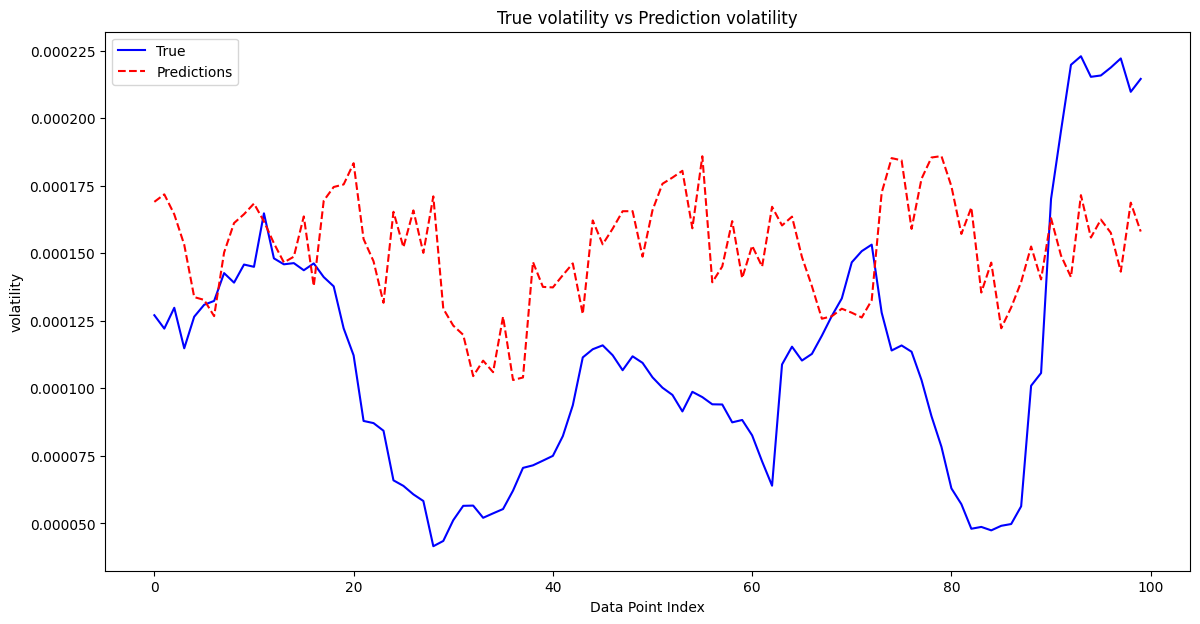

In [23]:
plot_range_lgbm(0,100)

In [ ]:
nfold = 10
folds = KFold(n_splits=nfold, shuffle = False)

# Placeholder for out of fold predictions

# Create a train dataset
train_data = lgb.Dataset(X_train, y_train)

# Cross validation with early stopping and custom feval
cv_results = lgb.cv(params, train_data, num_boost_round=500, folds=folds, early_stopping_rounds=50,
                    stratified=False, return_cvbooster=True)

TypeError: ignored

In [ ]:
# CV 결과에서 booster 모델들을 가져옴
cvbooster = cv_results['cvbooster']

# 예측을 저장할 배열을 생성
nfold = len(cvbooster.boosters)
predictions = np.zeros(len(X_test))

# 각 fold에 대한 모델로 예측을 수행
for i in range(nfold):
    booster = cvbooster.boosters[i]
    predictions += booster.predict(X_test)

# 예측 결과를 평균내어 최종 예측을 얻음
predictions /= nfold
y_pred = predictions

In [ ]:
rmspe(y_test, y_pred)

0.32644348802962636

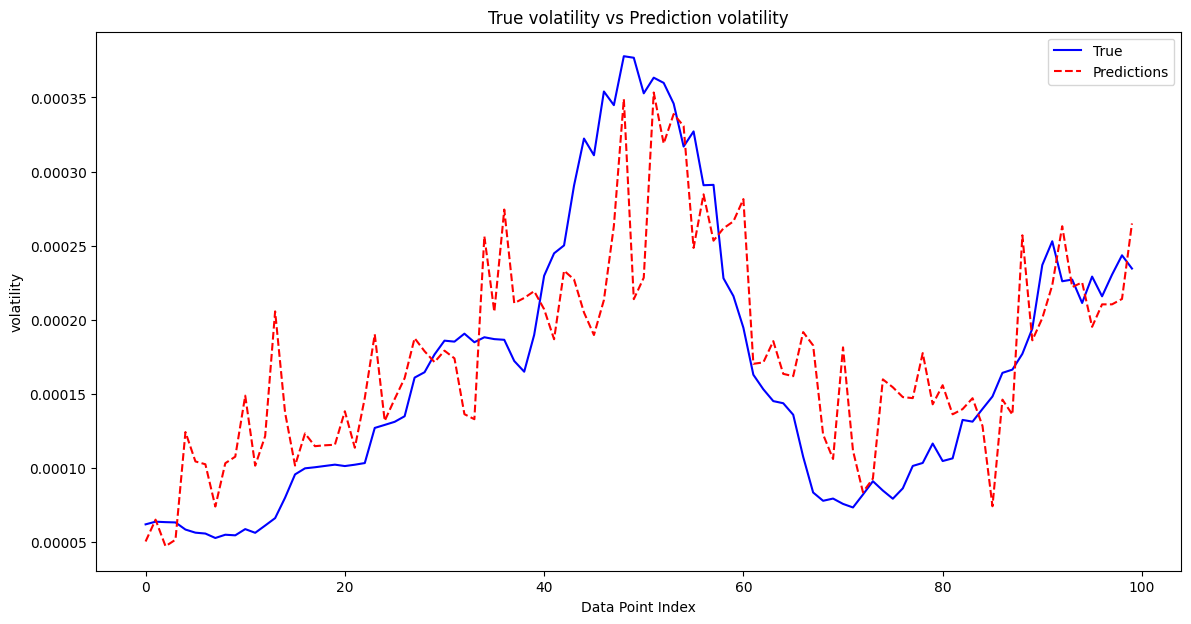

In [ ]:
plot_range_lgbm(0,100)

In [ ]:
y_pred.std()

5.176584496158937e-05